In [51]:
#https://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab
#https://www.pik-potsdam.de/members/franke/lecture-sose-2016/introduction-to-python.pdf
#https://scikit-learn.org/stable/modules/model_evaluation.html

import numpy as np
import matplotlib.pyplot as plt
from math import *
plt.style.use('classic')
from sklearn.metrics import mean_squared_error
import seaborn as sns


'''o processo ornstein-uhlenbeck satisfaz a SDE 
        dxt=θ(μ−xt)dt+σdWt
        discretizando :
        Xn+1=Xn+θ(μ−Xn)Δt+σΔWn
              
'''

'o processo ornstein-uhlenbeck satisfaz a SDE \n        dxt=θ(μ−xt)dt+σdWt\n        discretizando :\n        Xn+1=Xn+θ(μ−Xn)Δt+σΔWn\n              \n'

In [2]:
σ=0.5; θ=0.1; μ=1; dt=1e-2;
t=np.arange(0,2,dt);
x=np.zeros(len(t));
dW=np.zeros(len(t));
for i in range(1,len(t)-1):
        dW[i] = np.sqrt(dt)*np.random.normal()
        x[i+1]=x[i]+θ*(μ-x[i])*dt+σ*dW[i];

x[0]=x[i];


In [4]:
#murayama
y0=0;
y=np.zeros(len(t));
yx=np.zeros(len(t));
W=np.zeros(len(t));
err=np.zeros(len(t))
control=np.zeros(len(t))

for i in range(1,len(t)-1):
    #dW = exp(θ*t[i])*dW
    W[i+1] = W[i]+dW[i]*exp(θ*t[i])#np.sqrt(dt)*exp(θ*t[i])*np.random.normal(); 
    yx[i] = exp(-θ*t[i]);
    y[i] = μ*(1-yx[i])+σ*yx[i]*W[i];
    err[i]=abs(np.log(abs( x[i]-y[i])));
    

0.002204285460396757


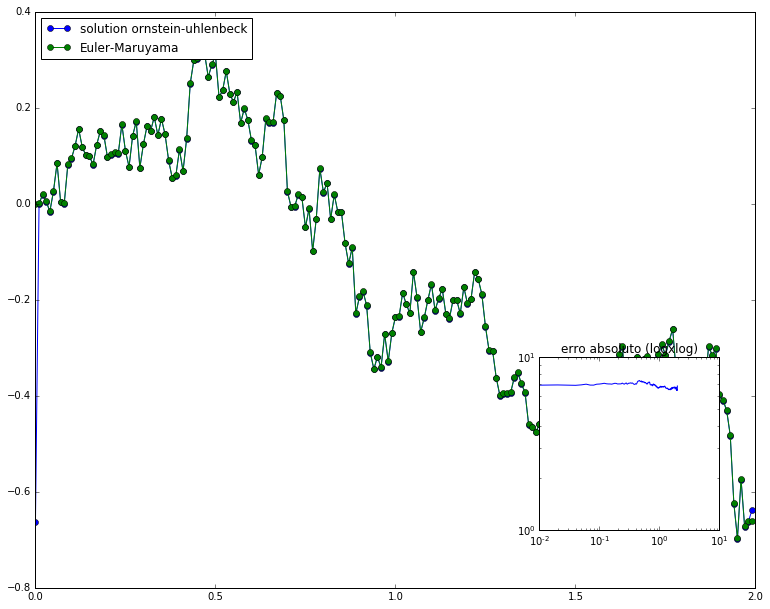

In [6]:
#o ponto y[len(t)-1] sempre será zero para a funçao implementada acima, para evitar isso achei razoável iguala-lo ao ponto mais próximo.

for i in range(1, len(t)-1):
  if(err[i]>np.mean(err)):
      control[i]=err[i];

y[len(t)-1] = y[len(t)-2]
err[0]=np.mean(err);
err[len(t)-1]=np.mean(err);


#print(np.mean(err))

fig = plt.figure(figsize=(10, 8))
ax1=fig.add_axes([0,0,1,1])
ax2=fig.add_axes([0.7,0.1,0.25,0.3])
ax1.plot(t,x,'-o', label='solution ornstein-uhlenbeck');
ax1.plot(t,y,'-o',label='Euler-Maruyama');
ax2.loglog(t,err);
ax2.set_title('erro absoluto (logxlog)')
ax1.legend(loc = 'upper left')
fig.savefig('graph.png')



#fig1= plt.figure(figsize=(10,10))
#ax3=fig1.add_axes([0,0,1,1])
#ax3.scatter(t,control)
#print(control)
#fig1.savefig('graph1.png')

#print(x)
#print(y)

print(mean_squared_error(x, y))
#plt.plot(t,x,'-o', label='solution ornstein-uhlenbeck');
#plt.plot(t,y,'-o',label='Euler-Maruyama');
#plt.legend(loc = 'upper left')
#fig.savefig('graph1.png')


#ax2.plt.loglog(t,err);

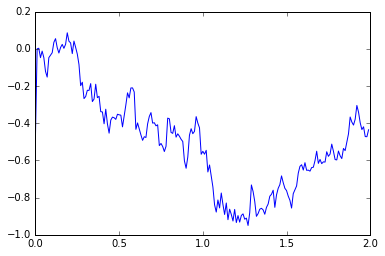

In [14]:
plt.plot(t, x)

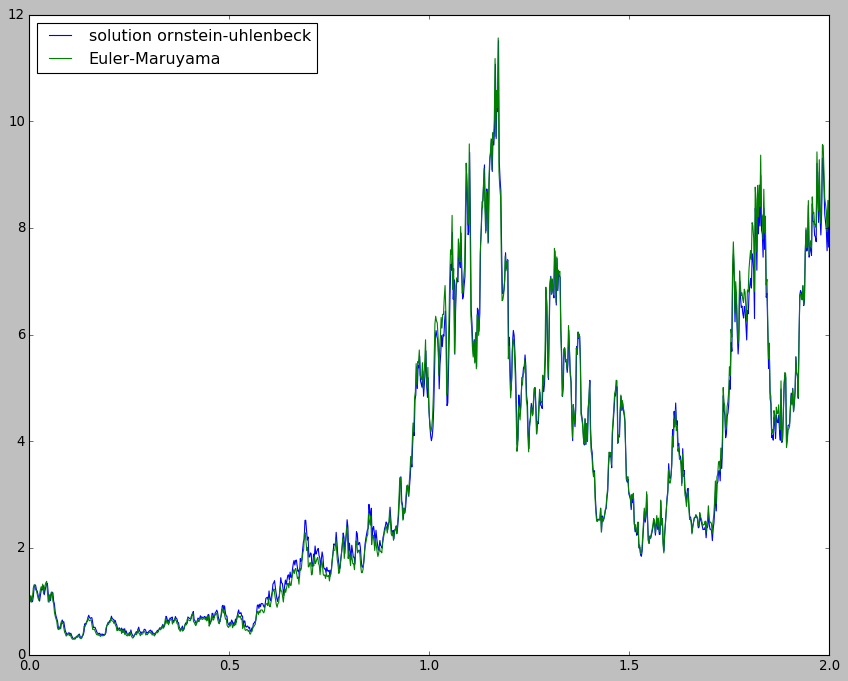

In [134]:
#r=np.random.RandomState(100)#exposes a number of methods for generating random numbers drawn from a variety of probability distributions
T=2; N=2**10;
#parametros
lamb=1; mu=2; Xzero=1
dt = T/N
dW=np.sqrt(dt)*np.random.randn(1,N)
W=np.cumsum(dW)
R=1; Dt=R*dt; L=N/R; #Parâmetros, Dt é um arbitrário de iterações
Xem=np.zeros(int(L)+1)
t=np.linspace(0,T,N+1)
Xtrue=np.zeros(len(t)+1)
aux=-2*lamb*t[1:]
#Xtrue=Xzero*np.exp(-lamb)*t[1:]+ mu*W*((1-np.exp(-2*lamb*t[1:]))/(2*lamb)); Xtrue=np.insert(Xtrue, 0, Xzero)
#Xtrue=Xzero*np.exp((-lamb))*t[1:]+mu*W#*(1-np.exp(-2*lamb*t[1:]))/(2*lamb)   

    
 #   t=np.linspace(0,T,N+1)

#dW=np.sqrt(dt)*np.random.randn(1,N)
#W=np.cumsum(dW)

Xtrue=Xzero*np.exp((-lamb)*t[1:]+mu*W); Xtrue=np.insert(Xtrue,0,Xzero)
#Xtrue=Xzero*np.exp((-lamb)*t[1:]+mu*W*((1-np.exp(-2*lamb))/(2*lamb))); Xtrue=np.insert(Xtrue,0,Xzero)
#W[i+1] = W[i]+dW[i]*exp(θ*t[i])
    
    # Return the cumulative sum of the elements along a given axis
#encontrei um erro na minha primeira versão do código, usei a função randn, mas por algum motivo o resultado de Winc sempre era zero, acabei por trocar para random.normal
    #Xtrue = Xzero*np.exp((lamb-0.5*mu**2)*T+mu*W[-1])
   # plt.plot(np.arange(0,T, dt), Xtrue)
    #plt.title("all plots")
Xtrue=np.insert(Xtrue, 0, Xzero)
Xem=np.zeros(int(L)+1); 
Xem[0] = Xzero
for j in range(1, int(L)+1):
    Winc=np.sum(dW[0][range(R*(j-1),R*j)])
    Xem[j] = Xem[j-1] + Dt*lamb*Xem[j-1]+ mu*Winc*Xem[j-1]
        #Xerr[s,p]=np.abs(Xem-Xtrue)
    #    Xem[j] = Xem[j-1] + Dt*lamb*Xem[j-1] + mu*Xem[j-1]*Winc


fig = plt.figure(figsize=(10, 8))
ax1=fig.add_axes([0,0,1,1])
ax1.plot(np.linspace(0,T,N+2), Xtrue, label='solution ornstein-uhlenbeck');
ax1.plot(np.linspace(0, T, int(L)+1), Xem,label='Euler-Maruyama');  
ax1.legend(loc = 'upper left')


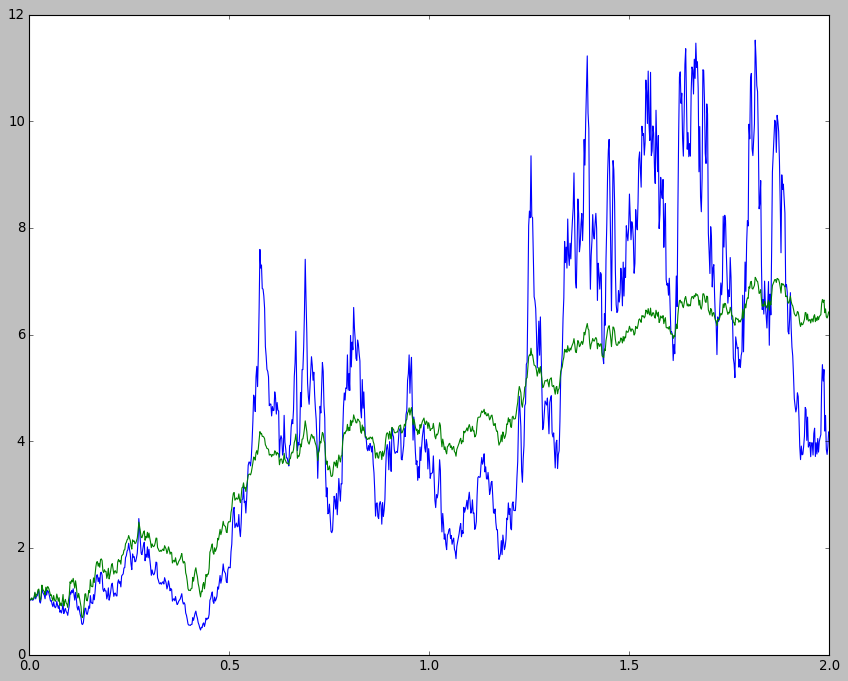

In [116]:
fig = plt.figure(figsize=(10, 8))
ax1=fig.add_axes([0,0,1,1])
ax1.plot(np.linspace(0,T,N+1), Xtrue, label='solution ornstein-uhlenbeck');
ax1.plot(np.linspace(0, T, int(L)+1), Xem,label='Euler-Maruyama');


In [23]:
Xtrue=Xzero*np.exp(-lamb)*t[1:]+ mu*W*exp((1-exp(-2*lamb))/(2*lamb))